In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\b-sbenjamin\Downloads\hotel_bookings.csv") #this is a dataframe aka simple Table just like sql aka 2-dimensional array aka simple expression of dictionary data structure a series is one-dimensional array aka simple list

In [5]:
type(df)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
df.shape

(119390, 32)

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
(df['children'] == 0) 

0         True
1         True
2         True
3         True
4         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Name: children, Length: 119390, dtype: bool

In [10]:
(df['children'] == 0) & (df['adults'] == 0)

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [11]:
#this filters the raw data, df by the adults, children and babies at the same time because if these columns contain 0 values, it cannot be used to determine bookings
first_filter = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)

In [12]:
first_filter

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [13]:
df[first_filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [14]:
df[first_filter].shape

(180, 32)

In [15]:
df[~first_filter].shape # this ~ is a negation operator in pandas it gives the number of rows and columns in the dataframe excluding the filter

(119210, 32)

In [16]:
df2 = df[~first_filter]

In [17]:
df2.duplicated() #this is a series

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119210, dtype: bool

In [18]:
df2.duplicated().sum() #this gives a total of the duplicated rows

31980

In [19]:
data = df2.drop_duplicates() #this removes the duplicate rows and stores it in a new dataframe called data

In [20]:
data.shape

(87230, 32)

In [21]:
#I want to perform descriptive analysis

In [22]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [23]:
data[['lead_time', 'total_of_special_requests', 'adr']].describe().T # adr is the average daily rate

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [25]:
data.info(memory_usage='deep') #this checks the amount of space that data is consuming in my computer's memory

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [26]:
for col in ['lead_time', 'total_of_special_requests', 'adr']:
    print('feature name : {}'.format(col))
    
    for i in range(90,101,1):
        quantile_value = np.quantile(data[col], q=1/100)
        print('{}th quantile value is {}'.format(i, quantile_value))
        print('\n')

feature name : lead_time
90th quantile value is 0.0


91th quantile value is 0.0


92th quantile value is 0.0


93th quantile value is 0.0


94th quantile value is 0.0


95th quantile value is 0.0


96th quantile value is 0.0


97th quantile value is 0.0


98th quantile value is 0.0


99th quantile value is 0.0


100th quantile value is 0.0


feature name : total_of_special_requests
90th quantile value is 0.0


91th quantile value is 0.0


92th quantile value is 0.0


93th quantile value is 0.0


94th quantile value is 0.0


95th quantile value is 0.0


96th quantile value is 0.0


97th quantile value is 0.0


98th quantile value is 0.0


99th quantile value is 0.0


100th quantile value is 0.0


feature name : adr
90th quantile value is 0.0


91th quantile value is 0.0


92th quantile value is 0.0


93th quantile value is 0.0


94th quantile value is 0.0


95th quantile value is 0.0


96th quantile value is 0.0


97th quantile value is 0.0


98th quantile value is 0.0


99th quantile 

In [27]:
#this performs a spatial analysis on guests hometown

In [28]:
#this checks for bookings that were not canmcelled
not_cancelled = data[data['is_canceled'] == 0]

In [29]:
not_cancelled.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [30]:
country_data = not_cancelled['country'].value_counts().reset_index()

In [31]:
country_data.columns = ['country', 'No. of guests'] #this customizes the column names

In [32]:
country_data

,country,No. of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [33]:
!pip install chart_studio  #chart_studio provides a web service to host your graph
!pip install plotly

ERROR: Invalid requirement: '#chart_studio'


In [34]:
import chart_studio.plotly as py
import plotly.graph_objs as go #plotly uses http services just to show your graph internally
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot , iplot #plot and iplot are used when you want to show your chart in your current notebook
init_notebook_mode(connected=True)

In [35]:
guest_map = px.choropleth(data_frame = country_data,
             locations=country_data['country'],
             color=country_data['No. of guests'], #this differentiates your country name by the number of guests feature; the higher the number of guests the lower the intensity of the color
             hover_name=country_data['country'],
             title='Home country of Guests') 

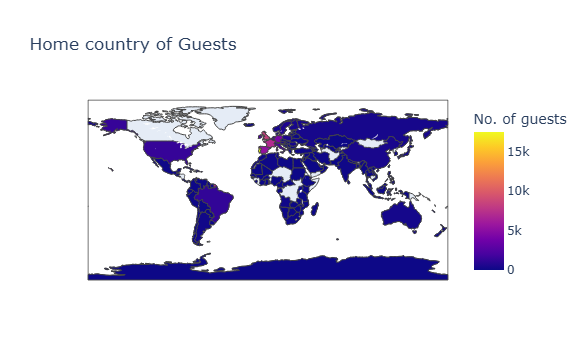

In [36]:
guest_map.show()

In [37]:
#this analyses the difference between assigned and reserved room types

In [38]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [39]:
pivot = pd.crosstab(index = data['reserved_room_type'], columns=data['assigned_room_type'], margins=True) #to get the all feature we used the margins parameter

In [40]:
pivot

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [41]:
#this normalizes the table/makes the values in form of percentages and rounds them up to 2 decimal places
normalized_pivot = pd.crosstab(index = data['reserved_room_type'], columns=data['assigned_room_type'], margins=True, normalize='index').round(2)*100

In [42]:
normalized_pivot #this shows the difference between the reserved room type and the assigned room type

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [43]:
#this analyses the market with the highest bookings

In [44]:
data['market_segment'].value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

In [179]:
data['market_segment'].value_counts().values #this gives the total count of the market segment column

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2],
      dtype=int64)

In [181]:
data['market_segment'].value_counts().index #this gives all the names of the market segment

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object', name='market_segment')

In [187]:
market_fig = px.pie(data, values=data['market_segment'].value_counts().values, names=data['market_segment'].value_counts().index)

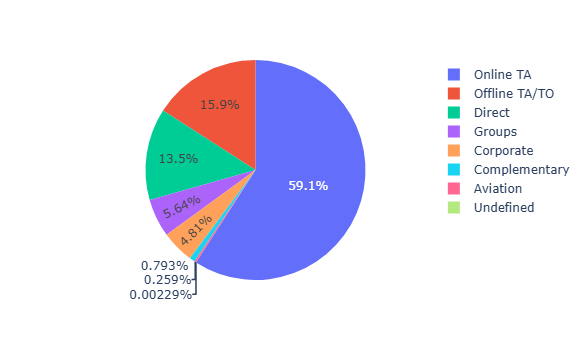

In [189]:
market_fig.show()

In [191]:
 #this analyses the average price per night of various room-types for all the market segments

In [193]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<Axes: xlabel='market_segment', ylabel='adr'>

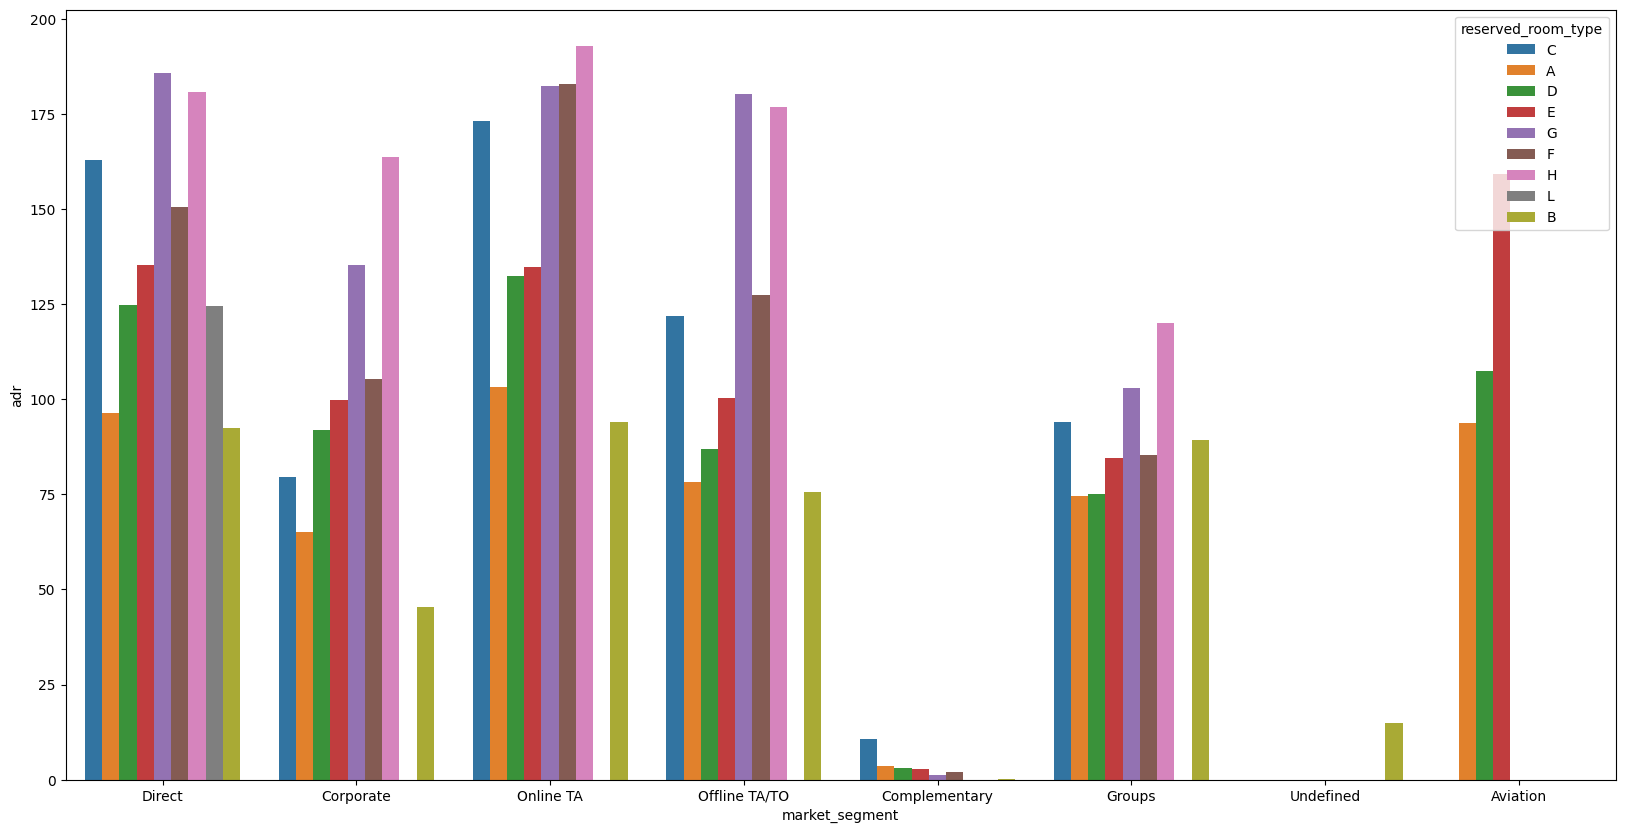

In [201]:
plt.figure(figsize=(20,10)) #this maximizes the plot size
sns.barplot(x='market_segment', y='adr', hue='reserved_room_type', data=data, errorbar=None) #adr is the average daily rate

In [ ]:
#this analyses the pattern of guests arrival on a daily basis

In [203]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [205]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [207]:
month_dict = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [214]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [216]:
data['arrival_date_month_index'] = data['arrival_date_month'].map(month_dict) 

In [218]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index'],
      dtype='object')

In [222]:
data[['arrival_date_year', 'arrival_date_month_index', 'arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [226]:
#this is the conversion of the columns above into a string for easy concatenation
data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month_index'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str)

In [228]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015-7-1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015-7-1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015,7,2015-7-1


In [230]:
data[['adults', 'children', 'babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [232]:
data['Total_guests'] = data['adults'] + data['children'] + data['babies']

In [236]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival_date,Total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015-7-1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015-7-1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,7/3/2015,7,2015-7-1,2.0


In [238]:
data[['arrival_date', 'Total_guests']]

,arrival_date,Total_guests
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0
...,...,...
119385,2017-8-30,2.0
119386,2017-8-31,3.0
119387,2017-8-31,2.0
119388,2017-8-31,2.0


In [240]:
#this groups the data and performs the sum of the total guests to get the total guests on a daily basis
data.groupby(['arrival_date'])['Total_guests'].sum()

arrival_date
2015-10-1     171.0
2015-10-10    210.0
2015-10-11    144.0
2015-10-12    235.0
2015-10-13    128.0
              ...  
2017-8-5      342.0
2017-8-6      322.0
2017-8-7      455.0
2017-8-8      284.0
2017-8-9      287.0
Name: Total_guests, Length: 793, dtype: float64

In [242]:
NotCancelled_data = data[data['is_canceled']==0]

In [246]:
guest_arrival_series = NotCancelled_data.groupby(['arrival_date'])['Total_guests'].sum()

In [248]:
guest_arrival_series

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

<Axes: xlabel='arrival_date'>

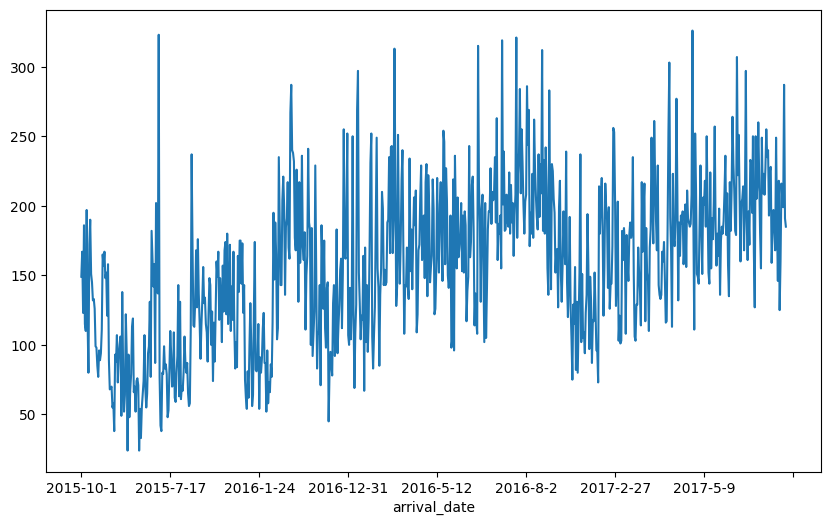

In [252]:
guest_arrival_series.plot(figsize=(10,6)) #this shows that there is no visible pattern in the guest arrival

In [ ]:
#this analyses the distribution of the guests_arrival

In [254]:
guest_arrival_series

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

In [256]:
type(guest_arrival_series)

pandas.core.series.Series

In [258]:
guest_arrival_series.values #this gives the array representation of the series

array([149., 167., 123., 186., 115., 110., 197., 118.,  80., 172., 190.,
       151., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
        94., 111., 165., 157., 167., 148., 152., 121., 158.,  89.,  68.,
        69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73.,  92., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  95.,  24.,  93.,  48.,
        68.,  79., 113., 119.,  66.,  70.,  52.,  74.,  76.,  71.,  24.,
        54.,  33.,  55.,  64.,  74., 107.,  68.,  55.,  65.,  94.,  99.,
       131.,  77., 182., 161., 142., 158.,  87., 202., 174., 137., 323.,
        77.,  42.,  38.,  80.,  79.,  99.,  83.,  86.,  79.,  48.,  53.,
        80., 110.,  93.,  70.,  71., 109.,  62.,  59.,  80.,  92., 143.,
        63., 131.,  61.,  70.,  67.,  81., 106.,  87.,  80.,  87.,  65.,
        56.,  58., 111., 237., 171., 114., 113., 131., 168., 127., 176.,
       137., 116.,  90., 114., 132., 156., 130., 134., 115., 109.,  88.,
       122., 148., 143., 100., 124.,  74., 116.,  8

<Axes: ylabel='Density'>

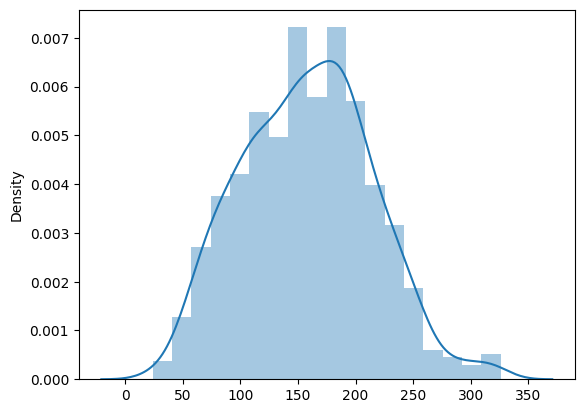

In [260]:
sns.distplot(guest_arrival_series.values) #this is a distribution plot 

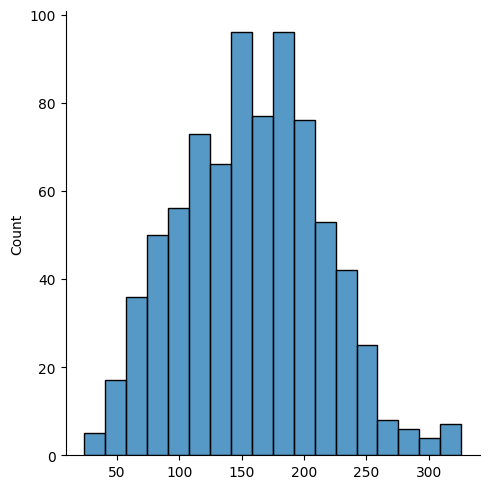

In [262]:
sns.displot(guest_arrival_series.values) #this by default returns a histogram

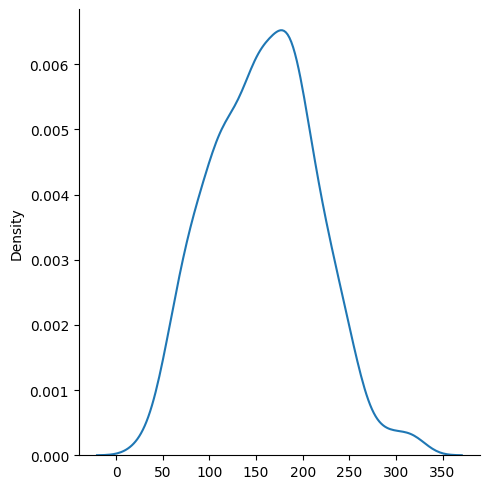

In [264]:
sns.displot(guest_arrival_series.values, kind='kde')  #this by default returns a density plot which is close to a normal distribution

In [266]:
np.mean(guest_arrival_series.values) #this is very approximately the same with the median so this means that this data is normally distributed

157.92559899117276

In [268]:
np.median(guest_arrival_series.values)
#normal distribution is symmetrical in nature 

158.0

In [270]:
np.std(guest_arrival_series.values)

56.48263702610786